In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [3]:
coins = cv2.imread(r"C:\Users\umut3\Desktop\AI\ML\ML_Udemy\Computer-Vision-with-Python\Computer-Vision-with-Python\DATA\pennies.jpg")

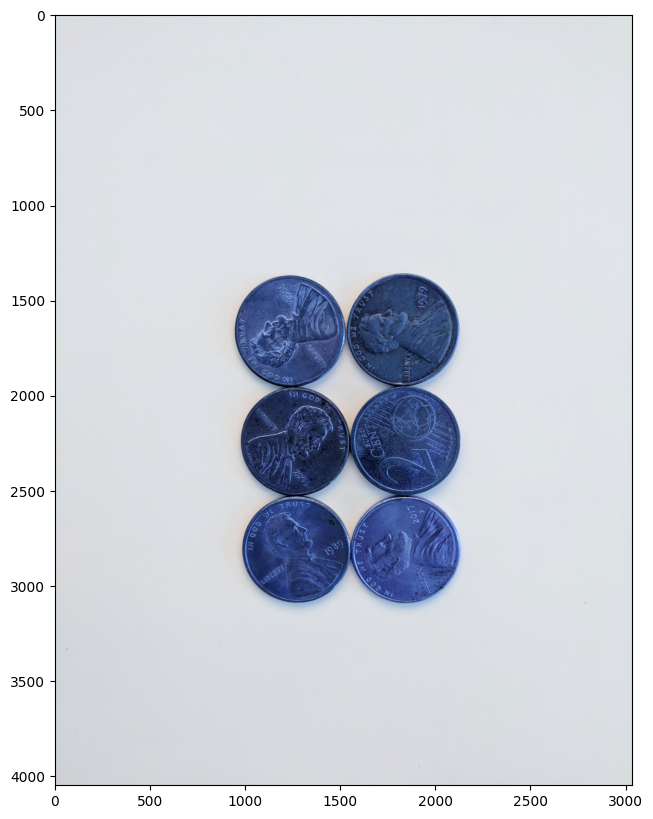

In [4]:
display(coins)

In [5]:
# Median Blur
# Grayscale
# Binary Threshold
# Find Contours

In [6]:
sep_blur = cv2.medianBlur(coins, 25)

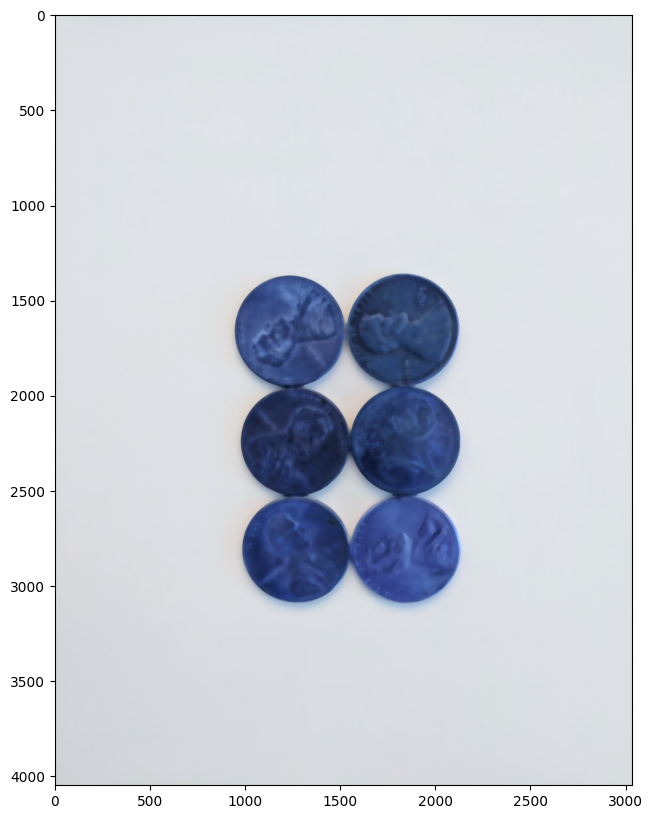

In [7]:
display(sep_blur)

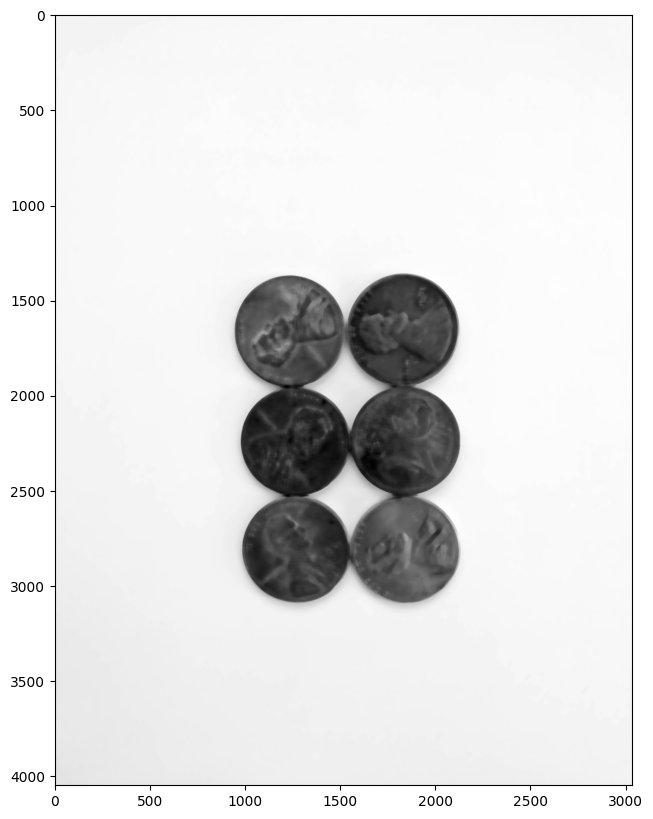

In [8]:
gray_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
display(gray_coins)

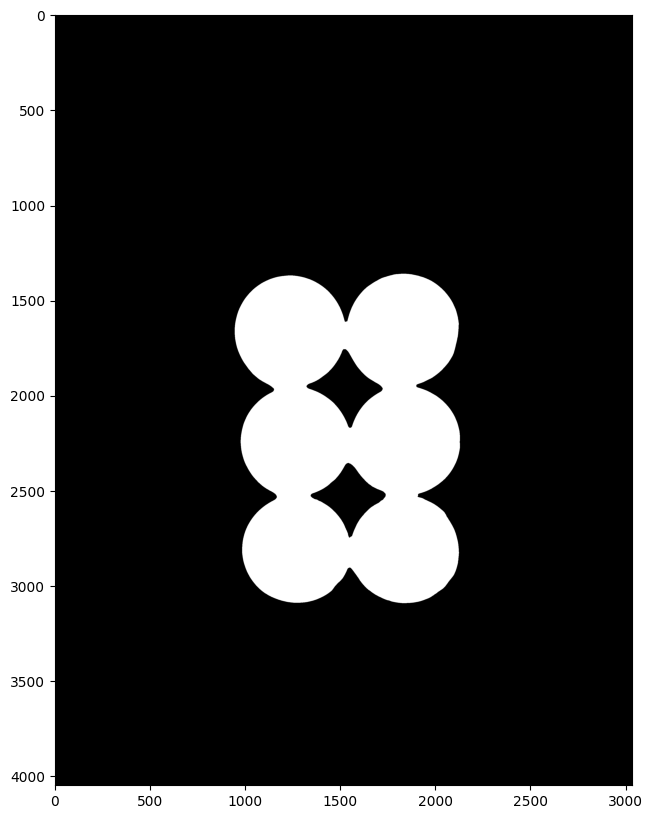

In [9]:
ret, sep_thresh = cv2.threshold(gray_coins, 160, 255, cv2.THRESH_BINARY_INV)
display(sep_thresh)

In [10]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
for i in range(len(contours)):

    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coins, contours, i, (255, 0, 0), 10)

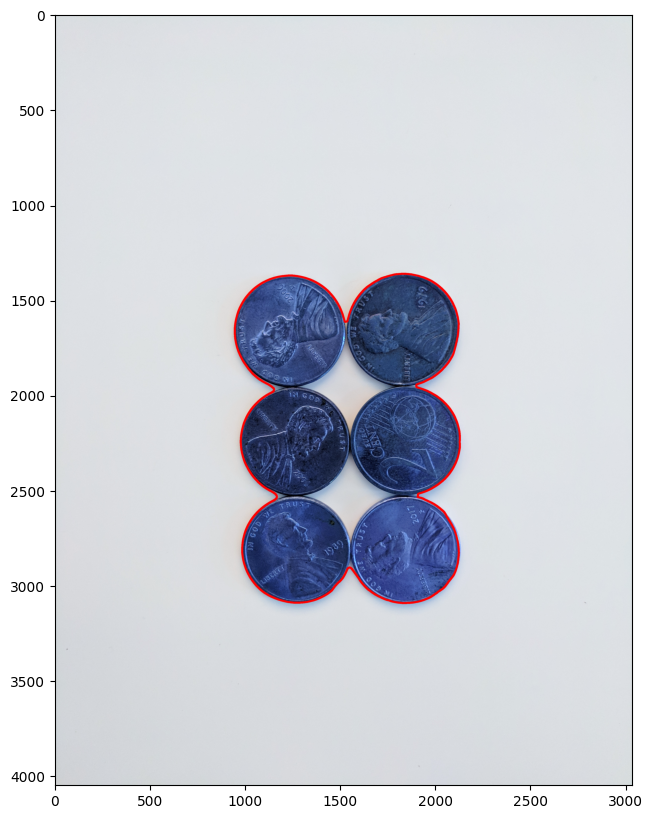

In [12]:
display(coins)

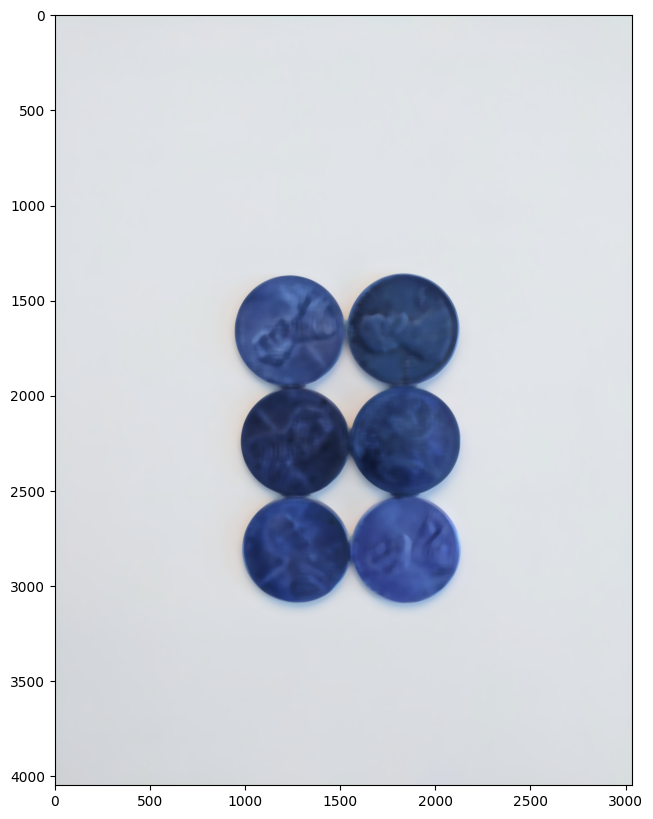

In [15]:
coins = cv2.imread(r"C:\Users\umut3\Desktop\AI\ML\ML_Udemy\Computer-Vision-with-Python\Computer-Vision-with-Python\DATA\pennies.jpg")
img = cv2.medianBlur(coins, 35)
display(img)

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [22]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

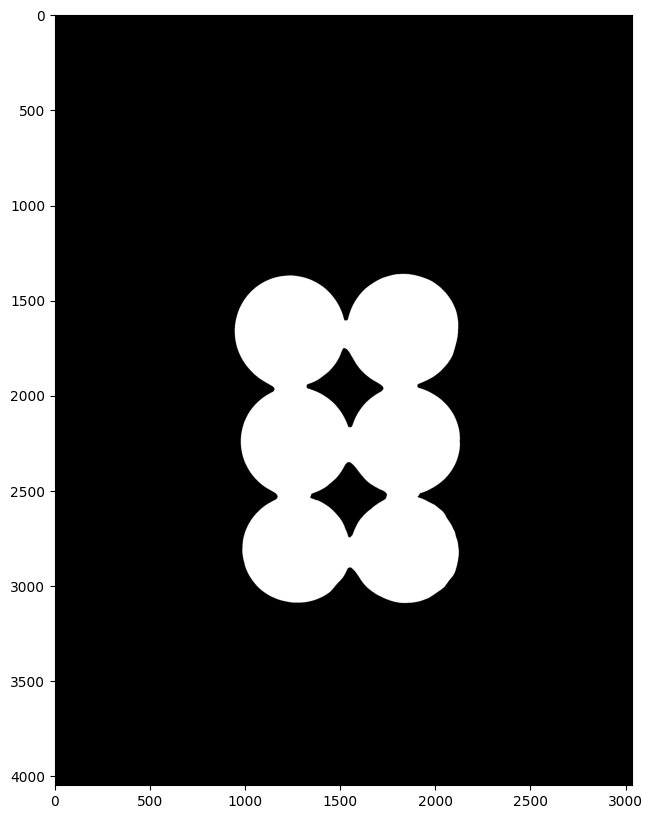

In [23]:
display(thresh)

In [24]:
# Noise Removal (optional)

In [25]:
kernel = np.ones((3, 3), np.uint8)

In [26]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [28]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

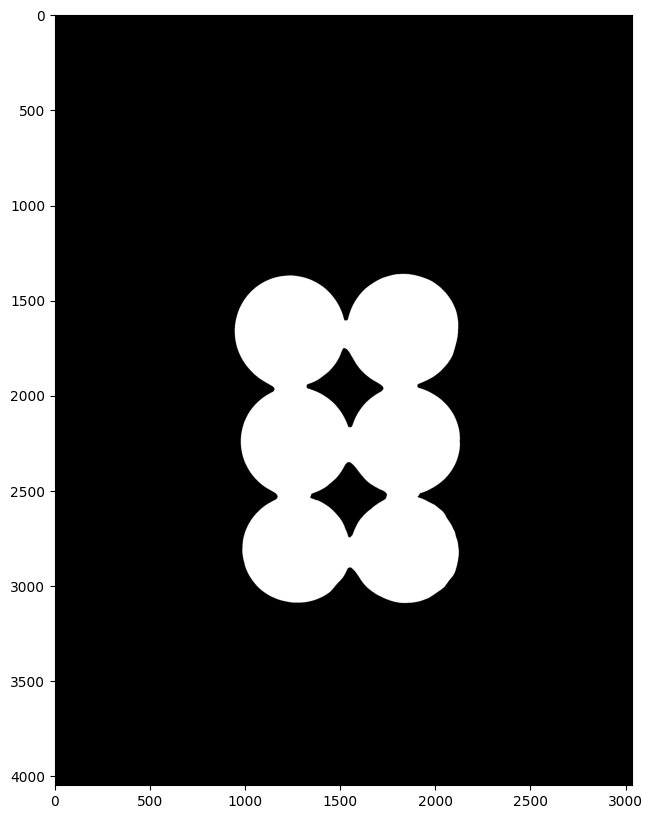

In [29]:
display(opening)

In [41]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

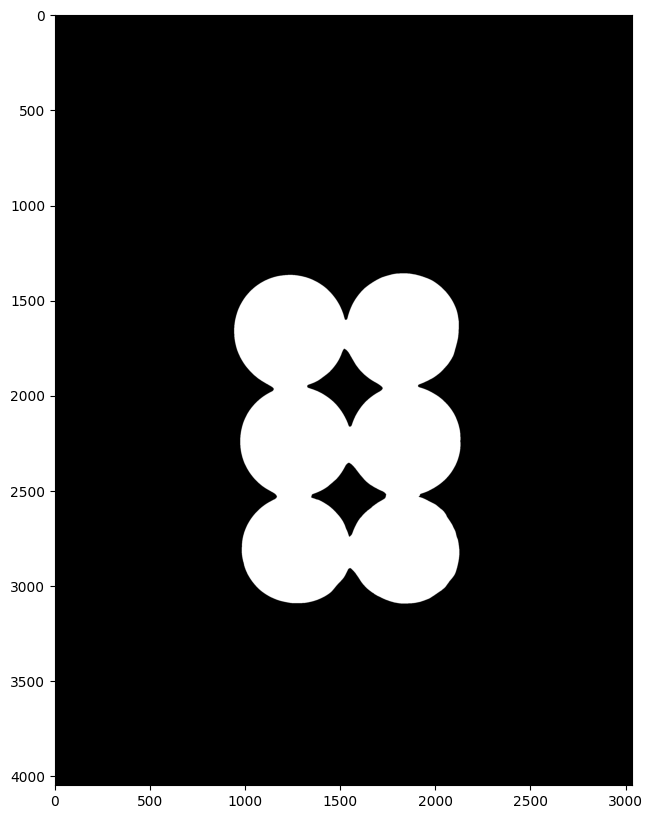

In [42]:
display(sure_bg)

In [43]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

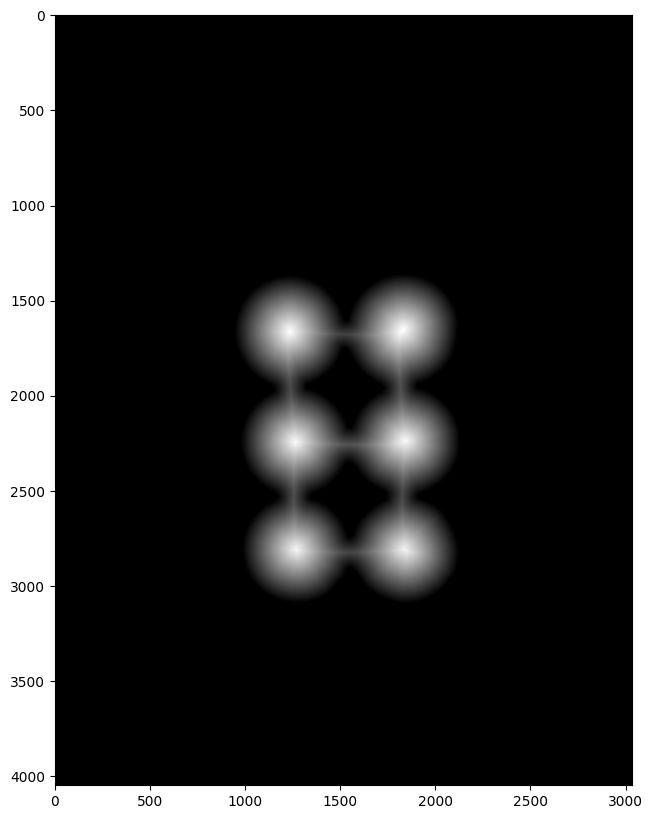

In [44]:
display(dist_transform)

In [45]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

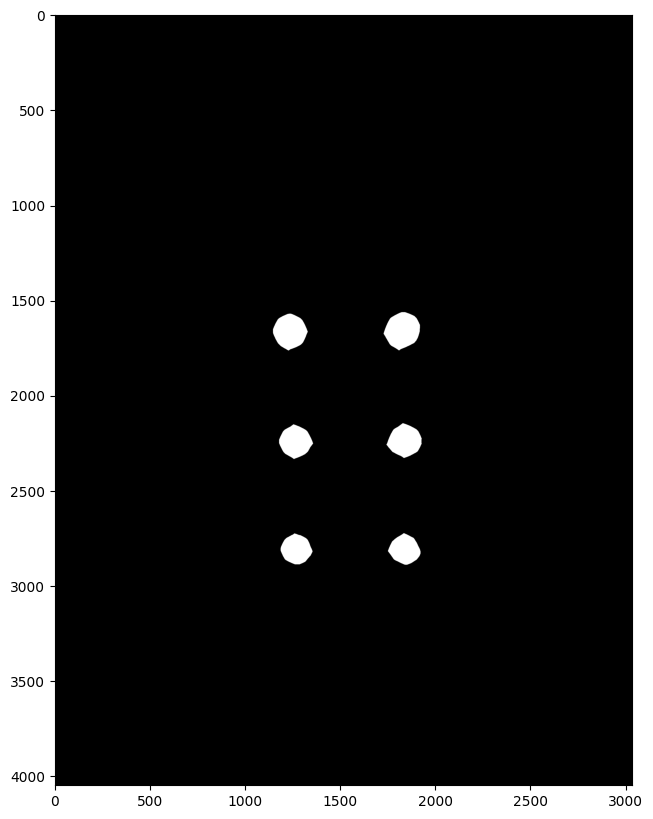

In [46]:
display(sure_fg)

In [47]:
sure_fg = np.uint8(sure_fg)

In [49]:
unknown = cv2.subtract(sure_bg, sure_fg)

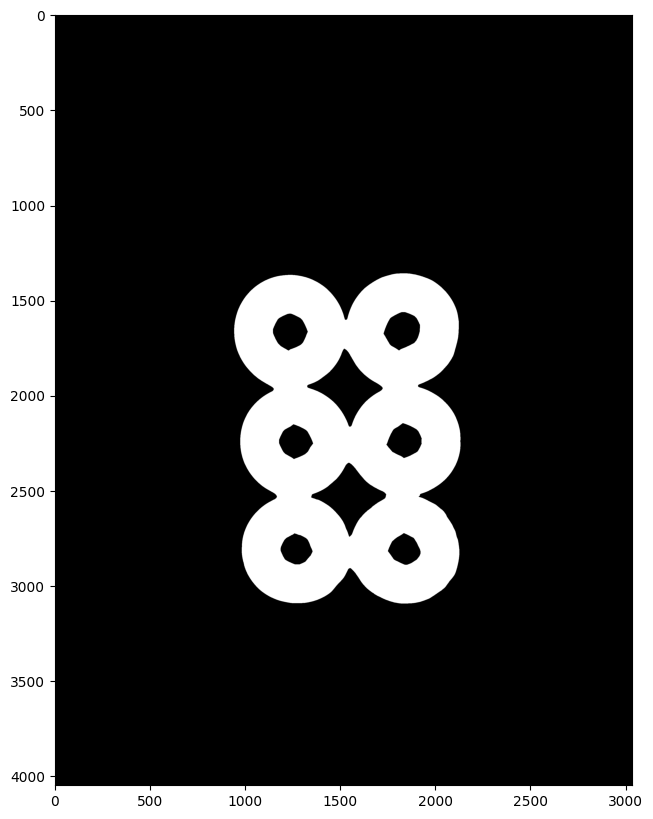

In [50]:
display(unknown)

In [51]:
ret, markers = cv2.connectedComponents(sure_fg)

In [52]:
markers = markers + 1

In [53]:
markers[unknown==255] = 0

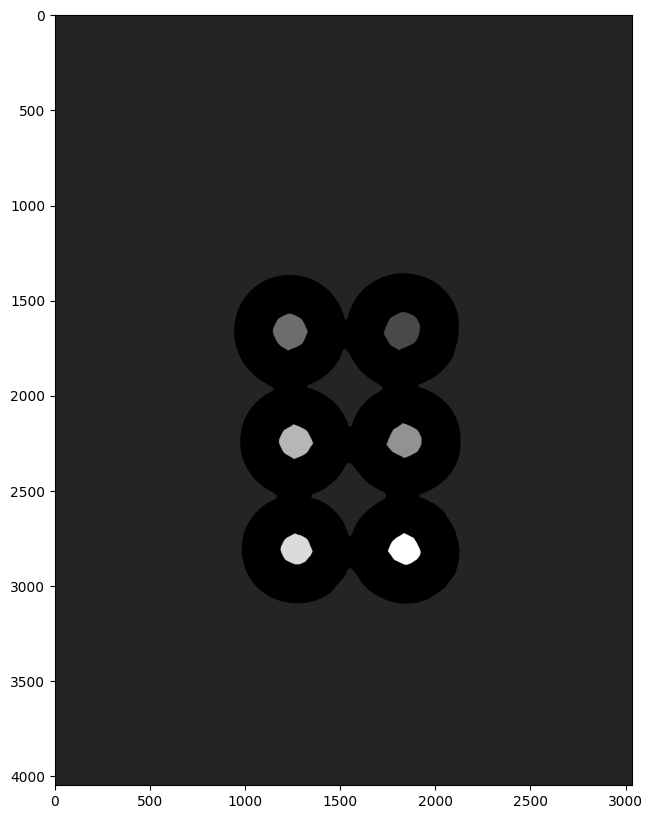

In [54]:
display(markers)

In [55]:
markers = cv2.watershed(img, markers)

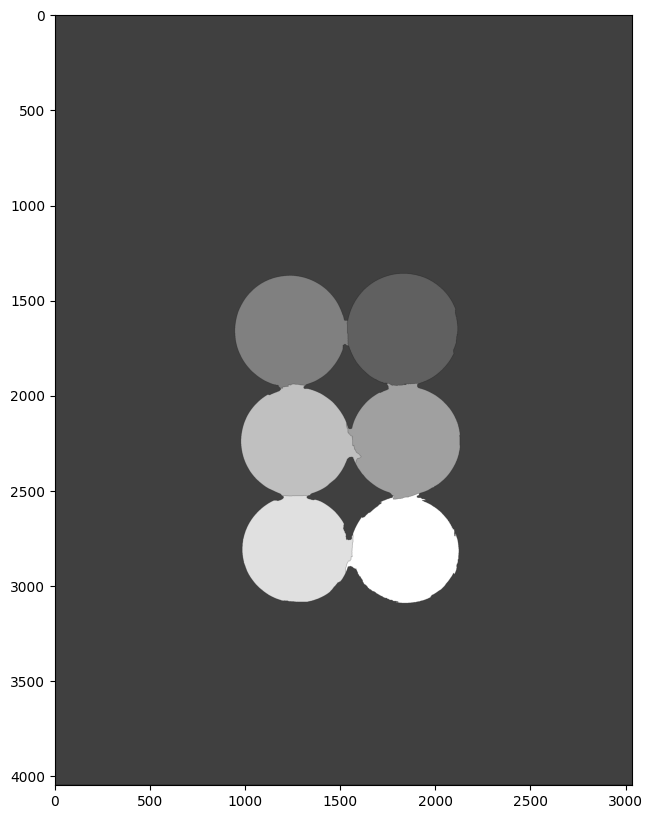

In [56]:
display(markers)